In [1]:
import pandas as pd
import string # laungue model
import seaborn as sns
import numpy as np

In [2]:
hotel = pd.read_excel("hotel_reviews.xlsx",sheet_name=0)
hotel.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0


In [3]:
hotel.shape

(20491, 2)

# 1. Data Cleaning

In [4]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  20491 non-null  object 
 1   Rating  20491 non-null  float64
dtypes: float64(1), object(1)
memory usage: 320.3+ KB


In [5]:
# missing values
hotel.isnull().sum()

Review    0
Rating    0
dtype: int64

In [6]:
# check for duplicate values
hotel.duplicated().sum()

0

# 2.EDA

In [7]:
hotel.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0


In [8]:
hotel['Rating'].value_counts()

5.0    9054
4.0    6039
3.0    2184
2.0    1793
1.0    1421
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

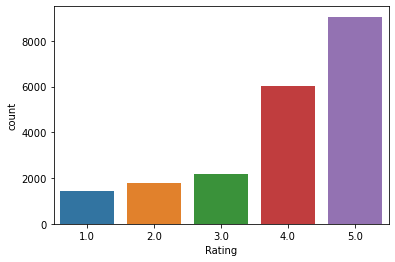

In [9]:
sns.countplot(x='Rating', data=hotel)

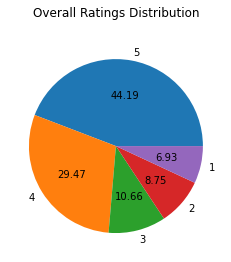

In [10]:
#Checking the total contribution of all ratings

import matplotlib.pyplot as plt
plt.pie(hotel['Rating'].value_counts(), autopct='%0.2f', labels=['5', '4', '3', '2', '1'])
plt.title('Overall Ratings Distribution\n')
plt.show()

# 3. Data Preprocessing

a. Lower case

b. Tokenization

c. Removing special characters

d. Removing stop words and punctuation

e. Stemming

# Lower cases.

In [11]:
def transform_Review(Review):
    Review = Review.lower()
    return Review

In [12]:
hotel.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0


# Tokenization 

In [13]:
def transform_Review(Review):
    Review = nltk.word_tokenize()
    return Review

In [14]:
hotel.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0


# Removing special characters

In [15]:
def transform_Review(Review):
    
    y = []
    for i in Review:
        if i.isalnum():
            y.append(i)
        
    return y

In [16]:
hotel.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0


# Removing stop words and punctuation
1. Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc. Such words are already captured this in corpus named corpus.



2. Punctuation  
Special Charactors


In [17]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
def transform_Review(Review):
    Review = y[:]
    y.clear()

In [19]:
def transform_Review(Review):
    for i in Review:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    return y

In [20]:
hotel.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0


# Stemming
1. Stemming with Python nltk package. "Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language."

In [21]:
def transform_Review(Review):
    
    for i in Review:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [22]:
hotel.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0


In [23]:
hotel["Review"][8]

'hotel stayed hotel monaco cruise, rooms generous decorated uniquely, hotel remodeled pacific bell building charm sturdiness, everytime walked bell men felt like coming home, secure, great single travelers, location fabulous, walk things pike market space needle.little grocery/drug store block away, today green, bravo, 1 double bed room room bed couch separated curtain, snoring mom slept curtain, great food nearby,  '

In [24]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

# Generate wordcloud

In [25]:
from textblob import TextBlob
from wordcloud import WordCloud

In [26]:
#Checking the most used words from reviews & plotting it using WordCloud
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 1000, height = 750, max_words=300,
                          background_color ='white',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
                        
    plt.figure(figsize = (6, 5), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=25)
    plt.show() 

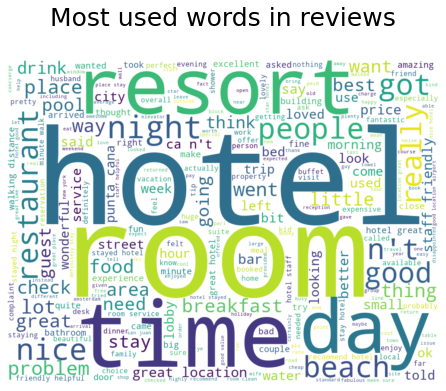

In [27]:
#Plotting the wordcloud on original data for all ratings
wordCloud_generator(data=hotel['Review'], title="Most used words in reviews\n")

Note:

1. Hotel, room, time, resort, beach, day, night, & poeple etc. were most commonly used words in overall reviews by users.

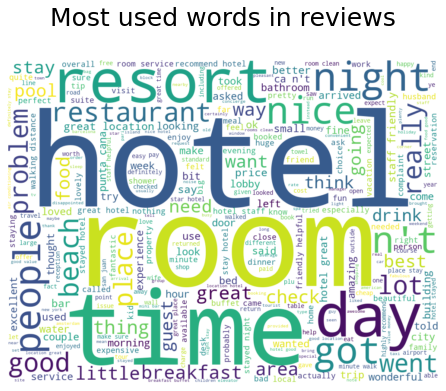

In [28]:
#Plotting the wordcloud on original data for all ratings
wordCloud_generator(data=hotel['Review'], title="Most used words in reviews\n")

Note:

1. Hotel, room, time, resort, beach, day, night, & poeple etc. were most commonly used words in overall reviews by users.


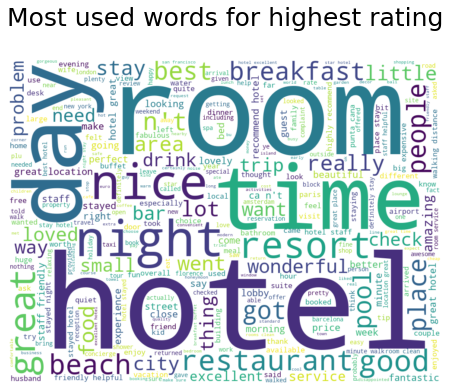

In [29]:
#Plotting the wordcloud on original data for all highest rating (5)
wordCloud_generator(data=hotel[hotel['Rating']==5]['Review'], title="Most used words for highest rating\n")

Note:

1. Great, nice, wonderful, good, loved, restaurant, hotel, room, day, etc. were some frequently used words by users who rated for score of 5, it seems they had a delightful experience at hotel.


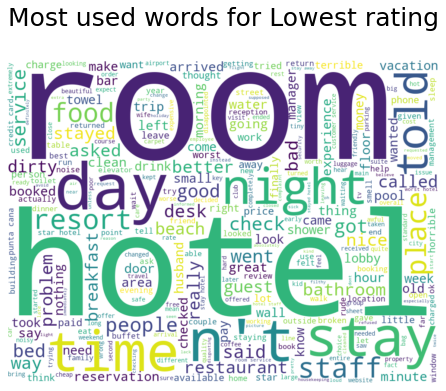

In [30]:
#Plotting the wordcloud on original data for all highest rating (1)
wordCloud_generator(data=hotel[hotel['Rating']==1]['Review'], title="Most used words for Lowest rating\n")

Note:
1. The users who were not happy or rated low for their experience have used Service, probelm, staff, desk, better, told, dirty, bad, day, hotel, room, food etc. these words frequently in their reviews.

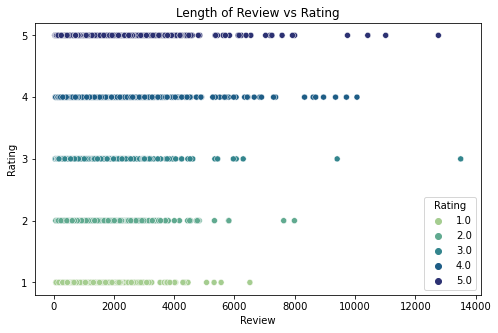

In [31]:
#Checking the length of words in a review for all the rating
plt.figure(figsize=(8,5))
sns.scatterplot(x=hotel['Review'].apply(len), y=hotel['Rating'], data=hotel, palette='crest', hue='Rating')
plt.title('Length of Review vs Rating')
plt.yticks([1,2,3,4,5])
plt.show()

Note:
1. From above visual, we can say that the length of review has an effect on ratings.
2. Lower ratings have lower length of review compared to top ratings.
3. Hence, there exists a positive correlation between Length of Reviews & Ratings.

# Create Bag of Words (BOW): CountVectorizer

In [32]:
X = hotel["Review"]

In [33]:
X

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not 4* experience hotel monaco seat...
3        unique, great stay, wonderful time hotel monac...
4        great stay great stay, went seahawk game aweso...
                               ...                        
20486    best kept secret 3rd time staying charm, not 5...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside, desk staff ...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking, ca n't believe excellent ratin...
Name: Review, Length: 20491, dtype: object

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
cv = CountVectorizer(max_features=3000)
cv_X = cv.fit_transform(X)

In [36]:
cv_X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [37]:
cv_X.shape

(20491, 3000)

#### We will classify all reviews:
#### with Rating== 1 or 2 or 3 as overall - '0'.
#### with Sentiment == 4 or5 as overall - '1'.

In [38]:
 classification = hotel["Rating"].apply(lambda rating : 1 if rating == 4.0 or 5.0 else 0)

In [39]:
y=[]
for i in hotel["Rating"]:
  if i == 4.0 or i == 5.0 :
    y.append(1)
  else:
    y.append(0)
hotel["rate"]= y

In [40]:
hotel.head()

,Review,Rating,rate
0,nice hotel expensive parking got good deal sta...,4.0,1
1,ok nothing special charge diamond member hilto...,2.0,0
2,nice rooms not 4* experience hotel monaco seat...,3.0,0
3,"unique, great stay, wonderful time hotel monac...",5.0,1
4,"great stay great stay, went seahawk game aweso...",5.0,1


In [41]:
y = hotel["rate"]

# Training & Testing

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(cv_X,y,train_size=0.75,random_state=0)

In [43]:
X_train.shape,X_test.shape

((15368, 3000), (5123, 3000))

# Apply Naive Bayes Algorithm

In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
model = MultinomialNB()

In [46]:
model.fit(X_train,y_train)

MultinomialNB()

# Accuracy Testing

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [48]:
y_pred = model.predict(X_test)

In [49]:
confusion_matrix(y_test,y_pred)

array([[1015,  352],
       [ 344, 3412]], dtype=int64)

In [50]:
accuracy_score(y_test,y_pred)

0.8641421042357993

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1367
           1       0.91      0.91      0.91      3756

    accuracy                           0.86      5123
   macro avg       0.83      0.83      0.83      5123
weighted avg       0.86      0.86      0.86      5123



<AxesSubplot:>

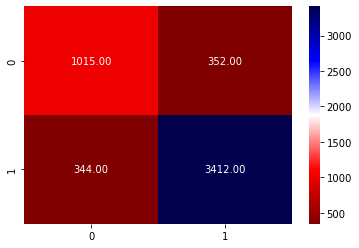

In [52]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='.2f', cmap='seismic_r')

# Apply Logistic Regression Algorithm

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model1 = LogisticRegression()

In [55]:
model1.fit(X_train,y_train)

C:\Users\Home\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Accuracy Testing

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [57]:
y_pred1 = model1.predict(X_test)

In [58]:
confusion_matrix(y_test,y_pred1)

array([[1025,  342],
       [ 309, 3447]], dtype=int64)

In [59]:
accuracy_score(y_test,y_pred1)

0.8729260199102089

In [60]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1367
           1       0.91      0.92      0.91      3756

    accuracy                           0.87      5123
   macro avg       0.84      0.83      0.84      5123
weighted avg       0.87      0.87      0.87      5123



<AxesSubplot:>

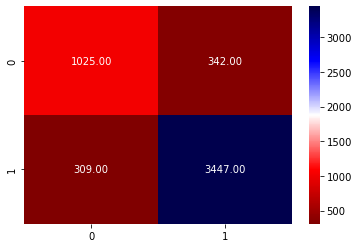

In [61]:
sns.heatmap(confusion_matrix(y_test,y_pred1), annot=True, fmt='.2f', cmap='seismic_r')

# Apply Random Forest Algorithm

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
model2 = RandomForestClassifier()

In [64]:
model2.fit(X_train,y_train)

RandomForestClassifier()

# Accuracy Testing

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [66]:
y_pred2 = model2.predict(X_test)

In [67]:
confusion_matrix(y_test,y_pred2)

array([[ 724,  643],
       [  82, 3674]], dtype=int64)

In [68]:
accuracy_score(y_test,y_pred2)

0.8584813585789577

In [69]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.53      0.67      1367
           1       0.85      0.98      0.91      3756

    accuracy                           0.86      5123
   macro avg       0.87      0.75      0.79      5123
weighted avg       0.86      0.86      0.85      5123



<AxesSubplot:>

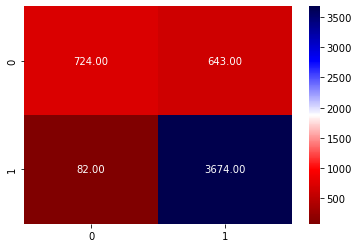

In [70]:
sns.heatmap(confusion_matrix(y_test,y_pred2), annot=True, fmt='.2f', cmap='seismic_r')

# Xgboost 

In [71]:
from xgboost import XGBClassifier

In [72]:
model3 = XGBClassifier()

In [73]:
model3.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

# Accuracy Testing

In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [75]:
y_pred3 = model3.predict(X_test)

In [76]:
confusion_matrix(y_test,y_pred3)

array([[ 947,  420],
       [ 214, 3542]], dtype=int64)

In [77]:
accuracy_score(y_test,y_pred3)

0.8762443880538747

In [78]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      1367
           1       0.89      0.94      0.92      3756

    accuracy                           0.88      5123
   macro avg       0.85      0.82      0.83      5123
weighted avg       0.87      0.88      0.87      5123



<AxesSubplot:>

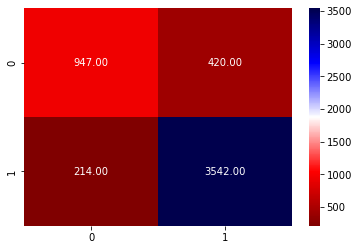

In [79]:
sns.heatmap(confusion_matrix(y_test,y_pred3), annot=True, fmt='.2f', cmap='seismic_r')

1. Naive Bayes         = 0.8641
2. XGBoost             = 0.8762
3. Logistic Regression = 0.8729
4. Random Forest       = 0.8596

# Select Final Algorithm

In [80]:
print("FInal Model is XGBoost Algorithm = 0.8762")

FInal Model is XGBoost Algorithm = 0.8762


# Pipeline

In [81]:
from sklearn.pipeline import Pipeline

In [82]:
from xgboost import XGBClassifier

In [83]:
classifier = []
classifier.append(('cv', CountVectorizer()))
classifier.append(("model",XGBClassifier()))

In [84]:
classifier

[('cv', CountVectorizer()),
 ('model',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, gamma=None,
                gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, n_estimators=100, n_jobs=None,
                num_parallel_tree=None, predictor=None, random_state=None,
                reg_alpha=None, reg_lambda=None, ...))]

In [85]:
model= Pipeline(classifier)

In [86]:
model

Pipeline(steps=[('cv', CountVectorizer()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=None, gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=None,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
                               random_state=None, reg_alpha=None,
                               reg_lambda=None, ...))])

In [87]:
X

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not 4* experience hotel monaco seat...
3        unique, great stay, wonderful time hotel monac...
4        great stay great stay, went seahawk game aweso...
                               ...                        
20486    best kept secret 3rd time staying charm, not 5...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside, desk staff ...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking, ca n't believe excellent ratin...
Name: Review, Length: 20491, dtype: object

In [88]:
model.fit(X,y)

Pipeline(steps=[('cv', CountVectorizer()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

# Model Saving

In [89]:
import pickle

In [90]:
f1 = open(file="Hotel_Final_model.pkl",mode="wb")
pickle.dump(model,f1)
f1.close()